In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

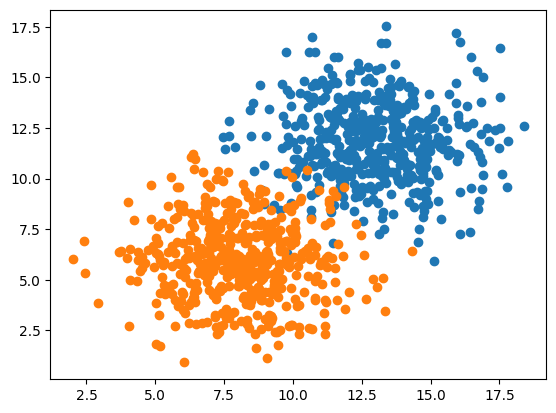

In [ ]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [ ]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2, ), activation='sigmoid')) # adding the property of a dense layer
adam = Adam(learning_rate=0.1) #learning rate =0.1
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=Y, verbose=1, batch_size=50, epochs = 500, shuffle=True)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4857 - loss: 2.9119
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3892 - loss: 1.3035
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5713 - loss: 0.6943
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8442 - loss: 0.4674
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9065 - loss: 0.3903
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8943 - loss: 0.3484
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9300 - loss: 0.3077
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9315 - loss: 0.2910
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9531 - loss: 0.2579
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9519 - loss: 0.2366
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9574 - loss: 0.2197
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

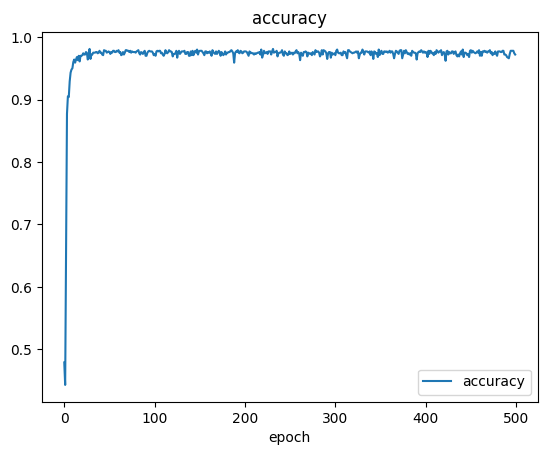

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

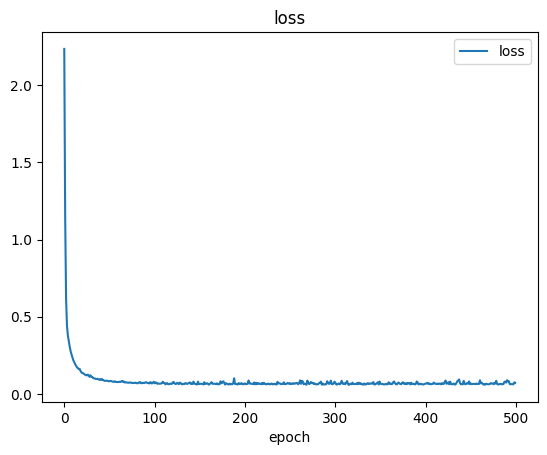

In [ ]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [ ]:
def plot_decision_boundary(X, Y, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1,)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1,)


  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)#these pridictions predict the propability
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)
  plt.scatter(X[:n_pts,0], X[:n_pts,1])
  plt.scatter(X[n_pts:,0], X[n_pts:,1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


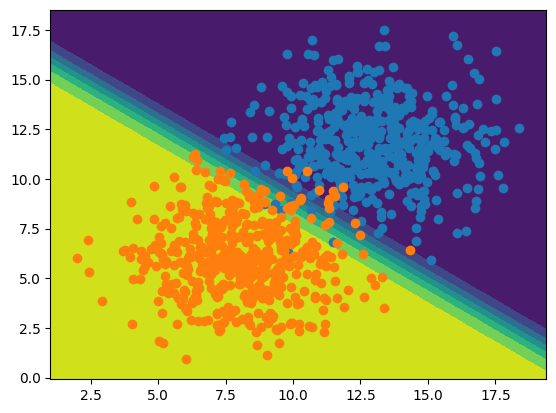

In [ ]:
plot_decision_boundary(X, Y, model)